In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
inputs = tf.placeholder(tf.float32, [None, 3000], 'inputs')
targets = tf.placeholder(tf.float32, [None, 10], 'targets')

/afs/inf.ed.ac.uk/user/s17/s1773005/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def get_error_and_accuracy(data):
    """Calculate average error and classification accuracy across a dataset.
    
    Args:
        data: Data provider which iterates over input-target batches in dataset.
        
    Returns:
        Tuple with first element scalar value corresponding to average error
        across all batches in dataset and second value corresponding to
        average classification accuracy across all batches in dataset.
    """
    err = 0
    acc = 0
    for input_batch, target_batch in data:
        err += sess.run(error, feed_dict={inputs: input_batch, targets: target_batch})
        acc += sess.run(accuracy, feed_dict={inputs: input_batch, targets: target_batch})
    err /= data.num_batches
    acc /= data.num_batches
    return err, acc

In [3]:
n_hidden_1 = 200
n_hidden_2 = 200
beta = 0.01 #0.009

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1'])+tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 100
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_3layers_200_L2_100 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 6324.06 running acc average = 0.25
End of epoch 2: running error average = 4718.55 running acc average = 0.33
End of epoch 3: running error average = 4131.62 running acc average = 0.39
End of epoch 4: running error average = 3772.05 running acc average = 0.43
End of epoch 5: running error average = 3505.03 running acc average = 0.48
End of epoch 6: running error average = 3261.16 running acc average = 0.54
End of epoch 7: running error average = 3069.01 running acc average = 0.59
End of epoch 8: running error average = 2899.80 running acc average = 0.64
End of epoch 9: running error average = 2740.67 running acc average = 0.69
End of epoch 10: running error average = 2585.18 running acc average = 0.74
End of epoch 11: running error average = 2444.94 running acc average = 0.78
End of epoch 12: running error average = 2303.09 running acc average = 0.81
End of epoch 13: running error average = 2160.37 running acc average = 0.85
End of epoch 14: runn

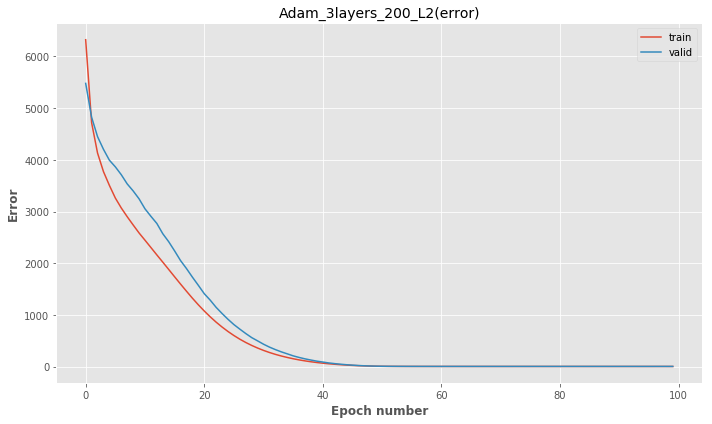

In [4]:
data = Adam_3layers_200_L2_100

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_3layers_200_L2(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_3layers_200_L2(error)_100.pdf')

[ 0.26816667  0.28533333  0.27216667  0.29266667  0.28466667  0.286
  0.27633333  0.2795      0.26233333  0.28566667  0.28716667  0.28766667
  0.287       0.28066667  0.28583333  0.2865      0.293       0.29816667
  0.29183333  0.285       0.29966667  0.29        0.29766667  0.303
  0.29783333  0.3125      0.28866667  0.28916667  0.29416667  0.313       0.3165
  0.319       0.30733333  0.308       0.31416667  0.318       0.32383333
  0.31816667  0.309       0.33416667  0.31616667  0.343       0.32616667
  0.33933333  0.33083333  0.336       0.3525      0.344       0.35583333
  0.38483334  0.39183333  0.43383333  0.427       0.45066667  0.43466666
  0.45283333  0.44616667  0.4505      0.45916667  0.46733333  0.45166667
  0.46016666  0.45516666  0.482       0.45683333  0.46883333  0.466
  0.47333333  0.46833333  0.46233333  0.46083333  0.45733333  0.44766667
  0.44133333  0.48        0.45416667  0.452       0.449       0.46933333
  0.48066666  0.45733333  0.44483333  0.44283333  0.454166

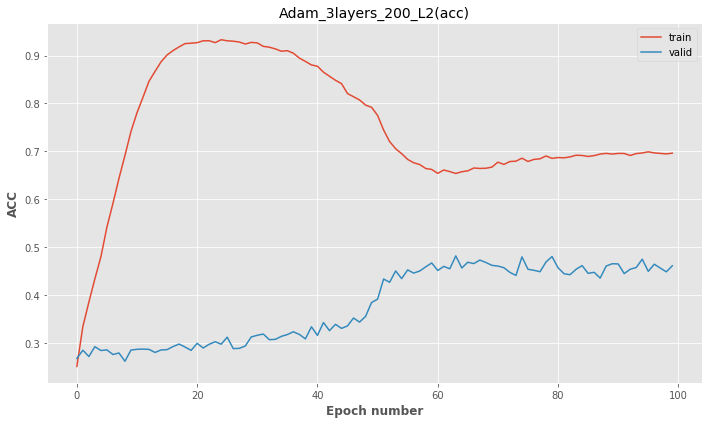

In [5]:
data = Adam_3layers_200_L2_100

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_3layers_200_L2(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_3layers_200_L2(acc)_100.pdf')
print(data[3])

In [6]:
n_hidden_1 = 300
n_hidden_2 = 300
beta = 0.01 #0.009

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1'])+tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 100
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_3layers_300_L2_100 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 9371.75 running acc average = 0.28
End of epoch 2: running error average = 7103.34 running acc average = 0.36
End of epoch 3: running error average = 6231.76 running acc average = 0.42
End of epoch 4: running error average = 5690.01 running acc average = 0.48
End of epoch 5: running error average = 5314.86 running acc average = 0.55
End of epoch 6: running error average = 5002.91 running acc average = 0.61
End of epoch 7: running error average = 4726.21 running acc average = 0.68
End of epoch 8: running error average = 4502.23 running acc average = 0.73
End of epoch 9: running error average = 4285.78 running acc average = 0.79
End of epoch 10: running error average = 4085.10 running acc average = 0.83
End of epoch 11: running error average = 3891.60 running acc average = 0.86
End of epoch 12: running error average = 3695.00 running acc average = 0.89
End of epoch 13: running error average = 3494.35 running acc average = 0.91
End of epoch 14: runn

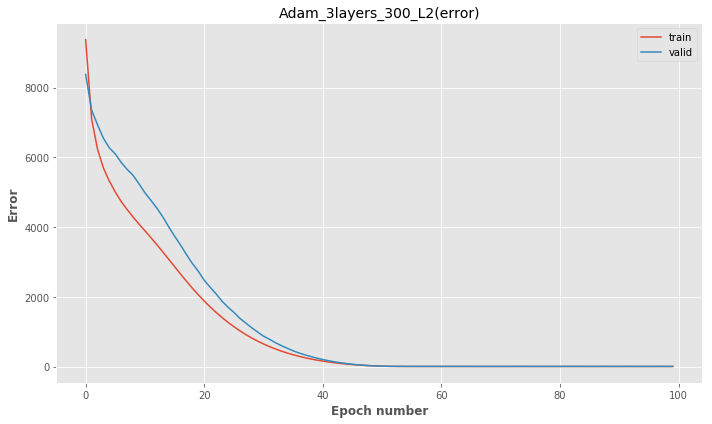

In [ ]:
data = Adam_3layers_300_L2_100

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_3layers_300_L2(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_3layers_300_L2(error)_100.pdf')

In [ ]:
data = Adam_3layers_300_L2_100

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_3layers_300_L2(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_3layers_300_L2(acc)_100.pdf')
print(data[1])
print(data[3])

[ 0.27594118  0.35944118  0.41932353  0.484       0.5475      0.61144118
  0.67629412  0.73120588  0.78682353  0.83223529  0.86020588  0.89032353
  0.90617647  0.91855882  0.92723529  0.93352941  0.938       0.94191176
  0.94523529  0.94129412  0.94617647  0.94273529  0.94597059  0.94547059
  0.94611765  0.9485      0.94488235  0.94752941  0.94352941  0.9412647
  0.94414706  0.93935294  0.93820588  0.93317647  0.92961764  0.93261764
  0.93114706  0.91970588  0.91397059  0.9135      0.90720588  0.90379411
  0.89291176  0.88464705  0.87505882  0.86585294  0.8572647   0.84867646
  0.83905882  0.83244117  0.83011764  0.80894117  0.77132353  0.73770588
  0.69935294  0.67852942  0.65741177  0.64497059  0.63694118  0.63611765
  0.62932353  0.63620589  0.63982353  0.63841177  0.64038236  0.64935295
  0.65302942  0.65476471  0.66117648  0.65805883  0.66714706  0.66608824
  0.67291177  0.67367648  0.67326471  0.67588236  0.67861765  0.681
  0.68432353  0.68441177  0.68714706  0.68602942  0.68747

In [ ]:
np.save('Adam_3layers_200_L2_100', Adam_3layers_200_L2_100)
np.save('Adam_3layers_300_L2_100', Adam_3layers_300_L2_100)